In [2]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 

# TODO: may have to add '..' if move from root folder
home = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))
pths = [os.path.join(home, 'astrobot')]

for pth in pths: 
    if pth not in sys.path: sys.path.insert(0, pth)

from astrobot.util import *

import matplotlib.pyplot as plt 
import numpy as np 
from pprint import pprint as pp 
# import pandas as pd 

# Tab after '.' to get all methods 
# Tab Shift after () to get documentation.
# To read excel data:
# pd.read_excel('afn_infil_data.xlsx')
# pd.read_clipboard()

# For experiments
# path to astrobot roo
ROOT_DIR

# path to this package from experiments folder
PACKAGE_FPATH_FOR_EXPERIMENTS

# path to epw from experiments folder
EPW_FPATH_FOR_EXPERIMENTS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'c:\\Users\\saera\\master\\astrobot\\resources\\epw\\philadelphia\\philadelphia.epw'

[[  25.  200.]
 [ 200. 2500.]]


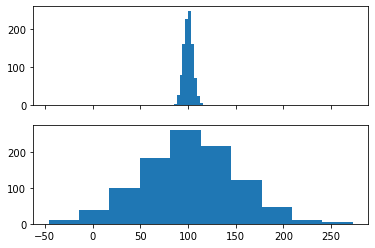

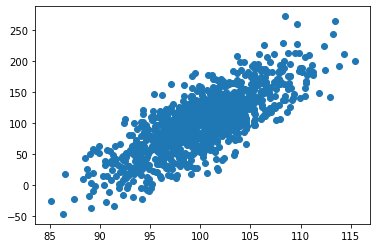

In [22]:
mu = [100, 100]  
std = [5, 50]
corr = 0.8
covs = np.array(
    [[std[0]**2          , std[0]*std[1]*corr], 
     [std[0]*std[1]*corr,           std[1]**2]])

print(covs)
m = np.random.multivariate_normal(mu, covs, 1000).T

f, a = plt.subplots(2, sharex=True)
_ = a[0].hist(m[0])
_ = a[1].hist(m[1])

f, a = plt.subplots(1)
a.scatter(m[0], m[1])

In [23]:
def cov(X, Y):
    return np.mean((X - X.mean()) * (Y - Y.mean()))
def cor(X, Y):
    return cov(X, Y) / (np.std(X) * np.std(Y))

def mtx(m, fx):
    return np.array(
        [[fx(m[0], m[0]), fx(m[0], m[1])],  
         [fx(m[1], m[0]), fx(m[1], m[1])]]
        ).round(2)

def rmse(m):
    m0 = m[0] - m[0].mean()
    m1 = m[1] - m[1].mean()
    return np.sqrt(np.mean((m0 - m1) ** 2))

# [[ 625. 1000.]
#  [1000. 2500.]]

print('Sqrt of Covariance (co-std):')
print(np.sqrt(mtx(m, cov)))
print('\nCorrelation:')   
print(mtx(m, cor))
print('RMSE:')
print(rmse(m))




Sqrt of Covariance (co-std):
[[ 4.83528696 13.7018247 ]
 [13.7018247  49.58064138]]

Correlation:
[[1.   0.78]
 [0.78 1.  ]]
RMSE:
45.90315962038108


In [24]:
"""
Std ~ 5, 50

Sqrt of Covariance (co-std):
[[ 5.15654923 14.58972241]
 [14.58972241 51.63370992]]

Correlation:
[[1.  0.8]
 [0.8 1. ]]

RMSE:
47.63726409851255


Std ~ 50, 50

Sqrt of Covariance (co-std):
[[48.9752999  43.49632168]
 [43.49632168 48.6359949 ]]

Correlation:
[[1.   0.79]
 [0.79 1.  ]]

RMSE:
31.308288940237514
"""


'\nStd ~ 5, 50\n\nSqrt of Covariance (co-std):\n[[ 5.15654923 14.58972241]\n [14.58972241 51.63370992]]\n\nCorrelation:\n[[1.  0.8]\n [0.8 1. ]]\nRMSE:\n47.63726409851255\n\n\nStd ~ 50, 50\n\nSqrt of Covariance (co-std):\n[[48.9752999  43.49632168]\n [43.49632168 48.6359949 ]]\n\nCorrelation:\n[[1.   0.79]\n [0.79 1.  ]]\nRMSE:\n31.308288940237514\n'